# Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import tensorflow as tf
import keras
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import models
from keras import layers
from keras import optimizers


In [5]:
train_dir = '/content/drive/MyDrive/CNN/Dataset/train_images'
validation_dir = '/content/drive/MyDrive/CNN/Dataset/test_images'
image_size = 150

In [6]:
from tensorflow.keras import Model

In [10]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/content/drive/MyDrive/Inception/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
#The layer we will use for feature extraction in Inception v3 is called mixed7.
#It is not the bottleneck of the network, but we are using it to keep a sufficiently large feature map (7x7 in this case).  
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
#Show a summary of the model. Check the number of trainable parameters
model.summary()

last layer output shape: (None, 7, 7, 768)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 74, 74, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 74, 74, 32)   0           batch_normalization_282[0][0]    
_________________________________________________

In [11]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [ ]:
# Training step
#Train the model. Here we will be using the imageDataGenerator for data augmentation.

In [12]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )


validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

cnn = models.Sequential([
     layers.Conv2D(filters =32, kernel_size=(3,3),activation = 'relu',input_shape = (150,150,3)),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters =64, kernel_size=(3,3),activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     # dense layer
     layers.Flatten(),
     layers.Dense(64,activation = 'relu'),
     layers.Dense(10,activation = 'softmax')
     ])

# Compile the model
cnn.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-3),metrics=['accuracy'])

history = cnn.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

model.save('InceptionV3_Pretrained_layers_model.h5')

Found 2408 images belonging to 10 classes.
Found 604 images belonging to 10 classes.
Epoch 1/10
76/76 [==============================] - 939s 12s/step - loss: 3.0384 - accuracy: 0.3638 - val_loss: 1.2868 - val_accuracy: 0.6821
Epoch 2/10
76/76 [==============================] - 76s 1s/step - loss: 1.1239 - accuracy: 0.6573 - val_loss: 0.7460 - val_accuracy: 0.7881
Epoch 3/10
76/76 [==============================] - 76s 995ms/step - loss: 0.7500 - accuracy: 0.7758 - val_loss: 0.6136 - val_accuracy: 0.8245
Epoch 4/10
76/76 [==============================] - 75s 988ms/step - loss: 0.6658 - accuracy: 0.7922 - val_loss: 0.4939 - val_accuracy: 0.8444
Epoch 5/10
76/76 [==============================] - 75s 986ms/step - loss: 0.5487 - accuracy: 0.8265 - val_loss: 0.3482 - val_accuracy: 0.8858
Epoch 6/10
76/76 [==============================] - 75s 989ms/step - loss: 0.5038 - accuracy: 0.8358 - val_loss: 0.5656 - val_accuracy: 0.8344
Epoch 7/10
76/76 [==============================] - 75s 987ms

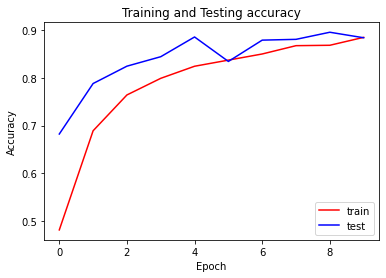

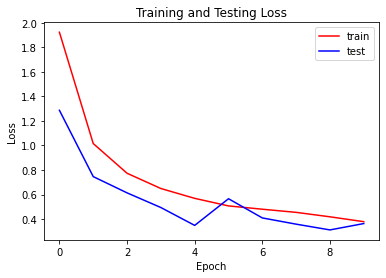

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0,10)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.figure()

plt.show()

In [15]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
# Get the filenames from the generator
fnames = validation_generator.filenames

ground_truth = validation_generator.classes
label2index = validation_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())

                
# Get the predictions from the model using the generator
predictions = cnn.predict(validation_generator,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))



Found 604 images belonging to 10 classes.
19/19 [==============================] - 5s 248ms/step
No of errors = 70/604


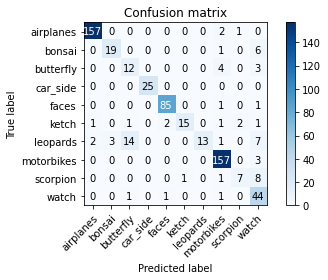

In [16]:
from sklearn.metrics import confusion_matrix
def PlotConfusionMatrix(ground_truth, predicted_classes):
    np.set_printoptions(precision=2)
    classes = ['airplanes','bonsai','butterfly','car_side','faces','ketch','leopards','motorbikes','scorpion','watch']
    title='Confusion matrix'
    cmap=plt.cm.Blues
    cm = confusion_matrix(ground_truth,predicted_classes)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    fmt ='d' 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j],fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()    
    plt.show()
PlotConfusionMatrix(ground_truth, predicted_classes)